In [1]:
import pandas as pd

In [2]:
FILE_PATH = 'aprovacao_alunos.xlsx'

df = pd.read_excel(FILE_PATH)
df.head(5)

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [5]:
df.corr().round(4)

,ano_2015,ano_2016
ano_2015,1.000,0.895
ano_2016,0.895,1.000


In [4]:
df.describe().round(2)

,ano_2015,ano_2016
count,27.00,27.00
mean,79.33,80.19
std,4.97,4.82
min,68.00,70.00
25%,76.00,76.50
50%,80.00,81.00
75%,81.50,82.50
max,89.00,91.00


c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ano_2015', ylabel='Count'>

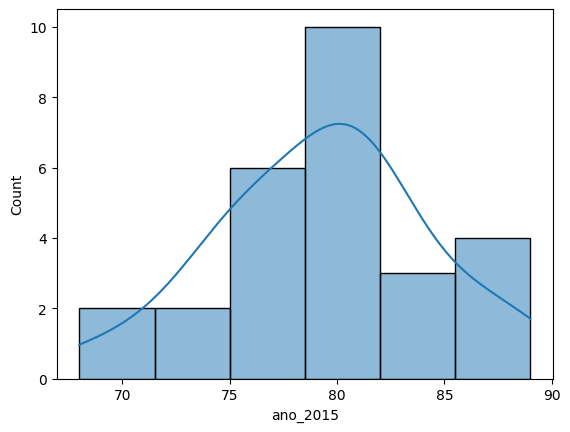

In [23]:
sns.histplot(df['ano_2015'], kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

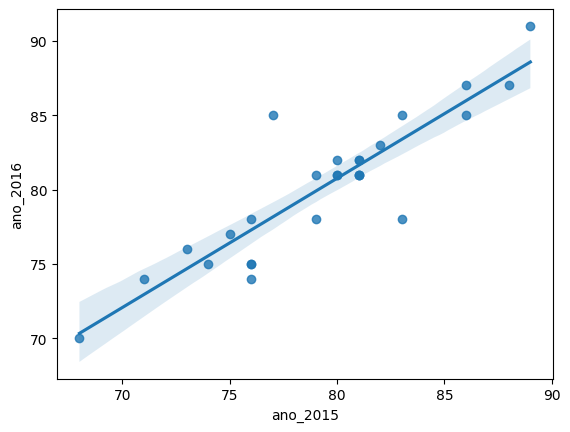

In [6]:
import seaborn as sns

sns.regplot(x='ano_2015', y='ano_2016', data=df)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
y = df['ano_2016']
X = df[['ano_2015']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import statsmodels.api as sm

In [11]:
X_train_const = sm.add_constant(X_train)

In [12]:
model_sm = sm.OLS(y_train, X_train_const, hasconst=True).fit()

In [13]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.40e-10
Time:                        16:35:35   Log-Likelihood:                -41.554
No. Observations:                  21   AIC:                             87.11
Df Residuals:                      19   BIC:                             89.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8350      6.112      1.282      0.2

In [14]:
from sklearn import metrics

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
print(f'R² -> {model.score(X_train, y_train).round(2)}')

R² -> 0.88


In [20]:
y_pred = model.predict(X_test)

In [22]:
import numpy as np

print(f'MAE  -> {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE  -> {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE -> {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

MAE  -> 2.1328424030620687
MSE  -> 9.855433680482752
RMSE -> 3.139336503225284
